In [1]:
!pip3 install texthero
!pip3 install wordcloud
!pip3 install contractions
!pip3 install -U spacy
!pip3 install -U nltk
!python -m spacy download en


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 25.3 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527974 sha256=820fa206f12d72b596c9bbc172ddca38381ae30e2d92eae3228d7239c4a688e9
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [2]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

print(locale.getpreferredencoding())


UTF-8
UTF-8


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
import texthero as hero 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from collections import Counter
import contractions

nltk.download('stopwords')
nltk.download("wordnet")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
lemma = WordNetLemmatizer()

In [6]:
data = pd.read_csv('dataset.csv', encoding='ISO-8859-1')

In [7]:
data.shape

(23994, 14)

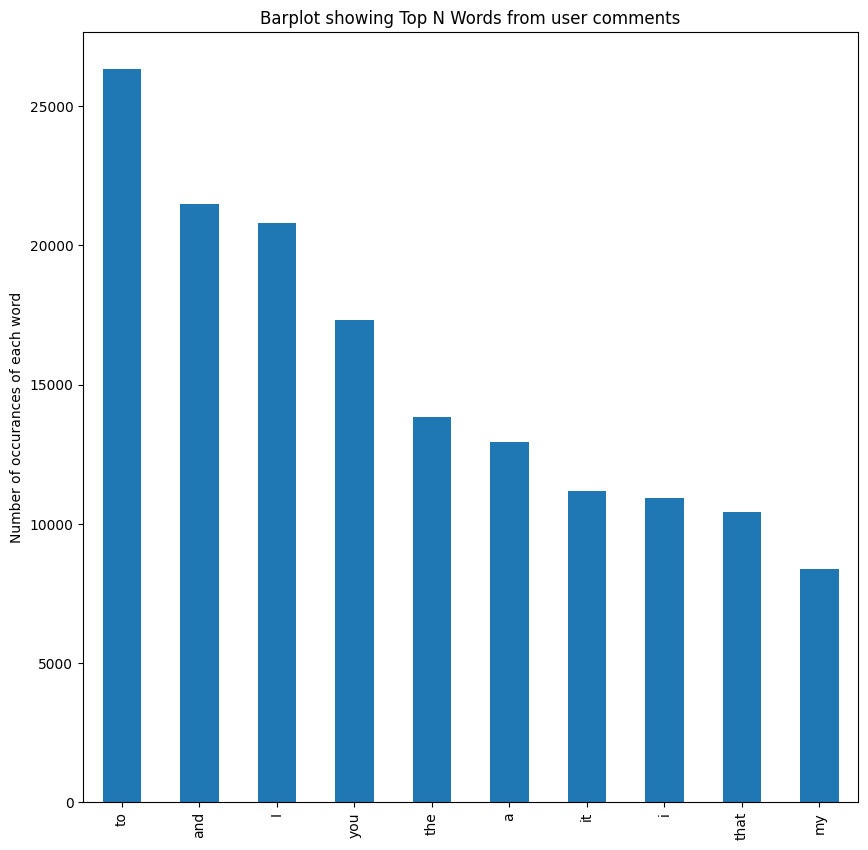

In [8]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

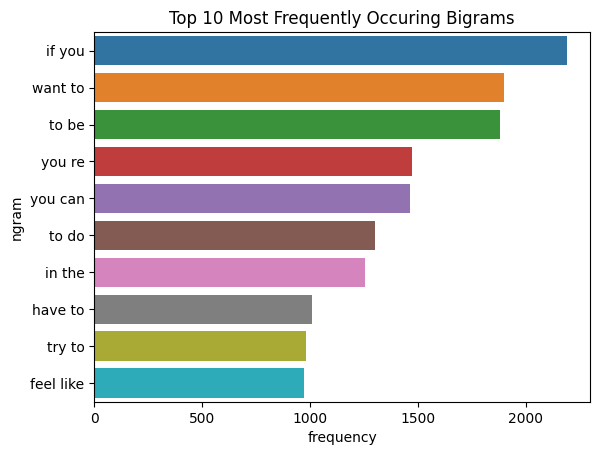

In [9]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [10]:
print(len(data.Content.unique()))
print(len(data))

23944
23994


In [11]:
print(len(data))

23994


In [12]:

def clean_text(text):
     # Remove anything that comes after "@"
    text = re.sub(r'@.*$#', '', text)
     # Keep only letters, numbers, and grammatical marks
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z0-9\s\.\?\!,]', '', text)
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

 # Apply the clean_text function to the "text" column of the dataset
data['Content'] = data['Content'].apply(clean_text)

 # Delete certain columns and the first row of data
columns_to_delete = ['ID', 'AuthorID', 'Author', 'Date', 'Words']
data = data.drop(columns=columns_to_delete)
# delete first row
data = data.iloc[1:]

for column in data.columns:
    if column != 'Content':
       data[column] = data[column].replace({'N': 0, 'Y': 1})
        
# Convert all non-"Contents" columns to integers
for column in data.columns:
     if column != 'Content':
         data[column] = pd.to_numeric(data[column], errors='coerce').astype('Int64')
        
# Save the cleaned dataset to a new CSV file
data.drop_duplicates(subset='Content',inplace=True)
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

data = data.rename(columns={'Change in appetite, losing or gaining weight': 'symptom_1'})
data = data.rename(columns={'Sleeping too much or not sleeping well (insomnia)': 'symptom_2'})
data = data.rename(columns={'Fatigue and low energy most days': 'symptom_3'})
data = data.rename(columns={'Feeling worthless, guilty, and hopeless': 'symptom_4'})
data = data.rename(columns={'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school': 'symptom_5'})
data = data.rename(columns={'Movements that are unusually slow or agitated (a change which is often noticeable to others)': 'symptom_6'})
data = data.rename(columns={'Thinking about death and dying; suicidal ideation or suicide attempts': 'symptom_7'})


data.to_csv('./cleaned_dataset.csv', index=False)

In [13]:
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
0,I wanted dead emotional abuse put friend,0,0,1,1,0,0,0,0
1,grandmother passed away. I realized mother hel...,0,0,0,1,0,0,0,0
2,Yea wen I overrule issue try replace wit thiers,0,0,0,0,0,0,0,1
3,"Try worry much people say, unless becomes real...",0,0,0,0,0,0,0,1
4,Me ex tried rekindle love 2 month broke up. My...,0,0,0,0,0,0,0,1


In [14]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23911 non-null  object
 1   symptom_1  23911 non-null  Int64 
 2   symptom_2  23911 non-null  Int64 
 3   symptom_3  23911 non-null  Int64 
 4   symptom_4  23911 non-null  Int64 
 5   symptom_5  23911 non-null  Int64 
 6   symptom_6  23911 non-null  Int64 
 7   symptom_7  23911 non-null  Int64 
 8   None       23911 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


In [15]:
data.drop_duplicates(subset='Content',inplace=True)
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23911 non-null  object
 1   symptom_1  23911 non-null  Int64 
 2   symptom_2  23911 non-null  Int64 
 3   symptom_3  23911 non-null  Int64 
 4   symptom_4  23911 non-null  Int64 
 5   symptom_5  23911 non-null  Int64 
 6   symptom_6  23911 non-null  Int64 
 7   symptom_7  23911 non-null  Int64 
 8   None       23911 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


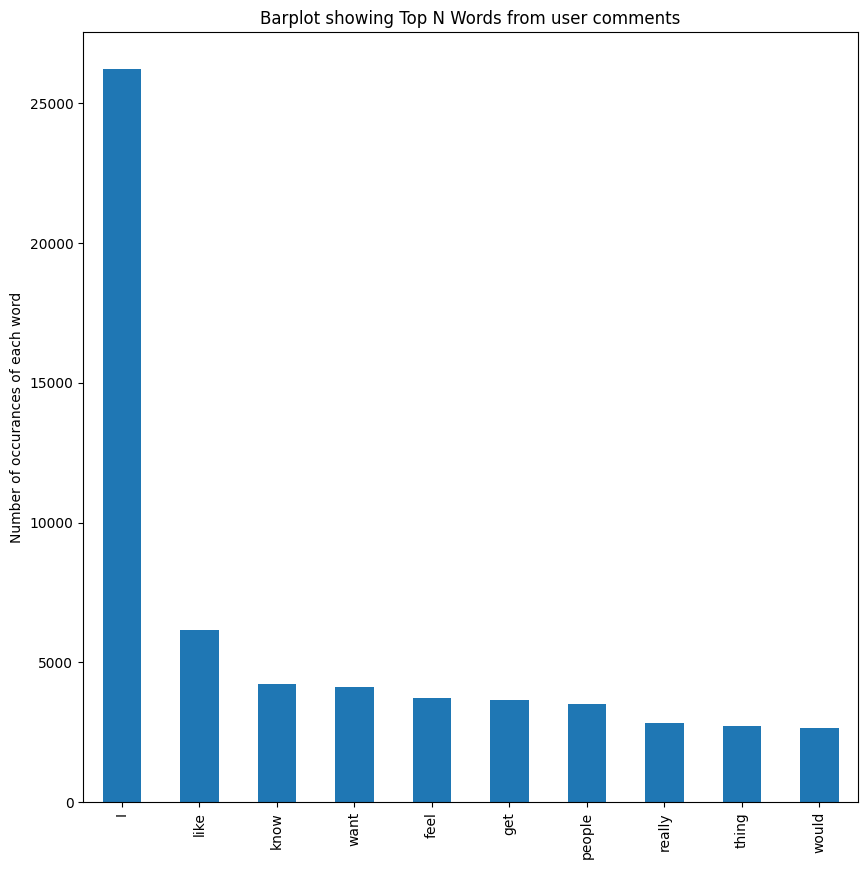

In [16]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

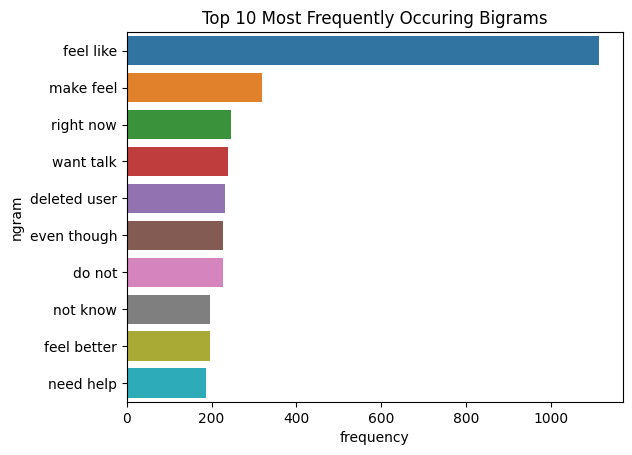

In [17]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

Text(0, 0.5, 'Frequency of Text Length')

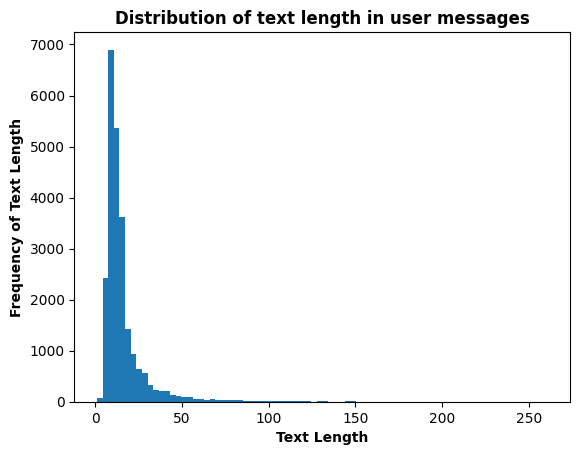

In [18]:
data["Words"] = data["Content"].apply(lambda n: len(n.split()))
data['Words'].plot.hist(bins=80)

plt.title('Distribution of text length in user messages', fontweight='bold')
plt.xlabel("Text Length", fontweight='bold')
plt.ylabel("Frequency of Text Length", fontweight='bold')

Text(0.5, 1.0, 'Wordcloud showing top N words')

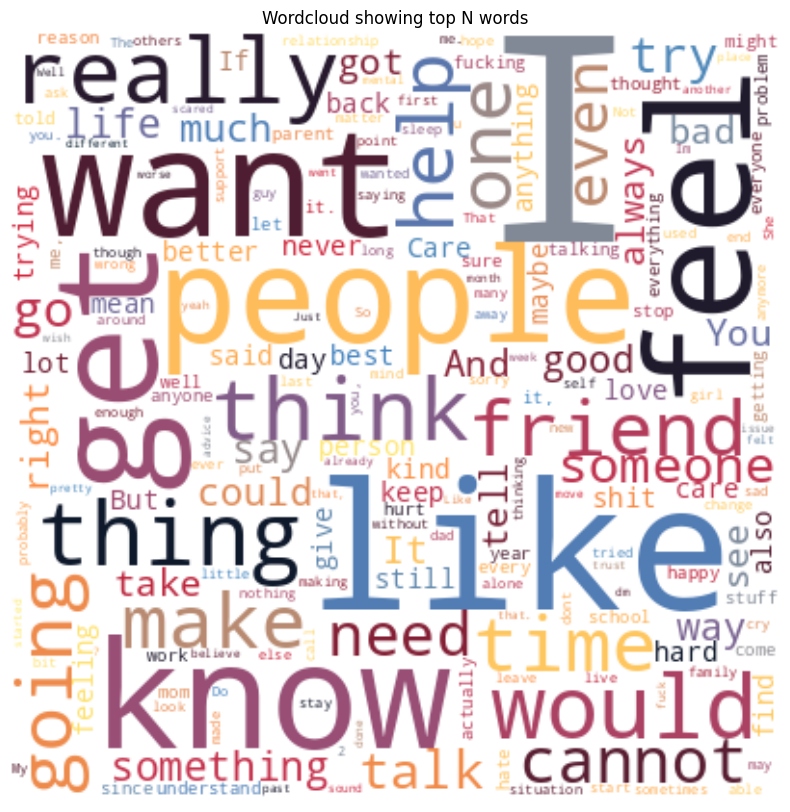

In [19]:
hero.visualization.wordcloud(data['Content'],width = 400, height= 400,background_color='White')
plt.title('Wordcloud showing top N words')

In [20]:
data = data.drop(columns='Words')
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
0,Buuuut I also organized dive later today I fee...,0,1,0,0,0,0,0,0
1,I provide kind explanation well misunderstanding,0,0,0,0,0,0,0,1
2,sitting room like hour half deciding cared eno...,0,0,0,0,0,0,0,1
3,"Yes, seem upsetting, way worded it, petty bloc...",0,0,0,0,0,0,0,1
4,got anything good supportive say person topic ...,0,0,0,0,0,0,0,1


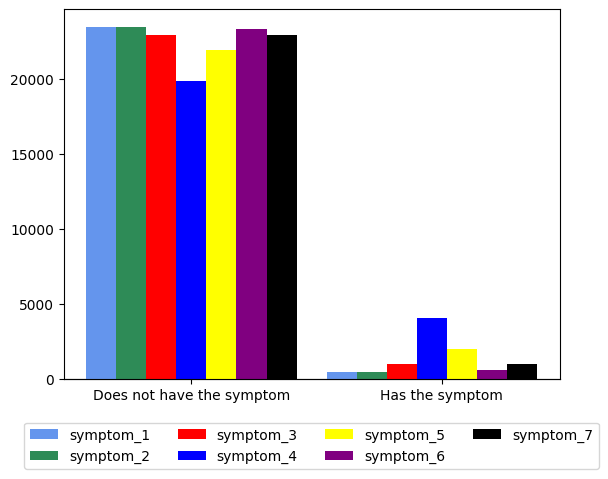

In [21]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0]) / 8.0

ax.bar(d_bins[:-1] + width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1] + width * 2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1] + width * 3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1] + width * 4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1] + width * 5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1] + width * 6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1] + width * 7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0] + width * 4, ss_bins[-1] - width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [22]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 KB 7.8 MB/s eta 0:00:00


In [23]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

In [24]:
tx = 'I am feeling sad. My belly hurts so bad and I want to die'
print(tx)

I am feeling sad. My belly hurts so bad and I want to die


In [25]:
aug = naw.SynonymAug(aug_src='wordnet', model_path=None, name='Synonym_Aug', aug_min=3, aug_p=0.2, lang='eng', 
                     stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, force_reload=False, 
                     verbose=0)
 
test_sentence_aug = aug.augment(tx)
print(tx)
print(test_sentence_aug[0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


I am feeling sad. My belly hurts so bad and I want to die
Ane am feeling sad. My belly hurts so bad and I want to pass


In [26]:
# powercount = {}
# powerlabels = np.unique(data['powerlabel'])
# for p in powerlabels:
#     powercount[p] = np.count_nonzero(data['powerlabel'] == p)
#     # print(powercount[p])

# maxcount = int(np.mean(list(powercount.values())))
# # print('maxcount: ', maxcount)
# desired_count = int(maxcount / 10)
# # print('desired_count: ', desired_count)

# new_data = pd.DataFrame()
# for p in powerlabels:
#     gapnum = maxcount - powercount[p]
#     if gapnum <= 0:
#         temp_df = data[data['powerlabel'] == p]
#         print(temp_df)
#         break

#     else:
#         temp_df = data.iloc[np.random.choice(np.where(data['powerlabel'] == p)[0], size=desired_count, replace=True)]
#         print(temp_df)
    
#     # undersample_num = powercount[p] - maxcount
#     # if undersample_num <= 0:
#     #     new_data = pd.concat([new_data, temp_df])
#     # else:
#     #     temp_df = temp_df.sample(n=maxcount, replace=False)
#         # new_data = pd.concat([new_data, temp_df])
    
# # data = new_data.sample(frac=1).reset_index(drop=True)
# # data.to_csv('./data_balanced.csv', index=False)


In [27]:
# powercount = {}
# x = 0
# y = 0
# powerlabels = np.unique(data['powerlabel'])
# # print(powerlabels)
# for p in powerlabels:
#     powercount[p] = np.count_nonzero(data['powerlabel'] == p)
#     # print(powercount[p])

# th = 10
# maxcount = int(np.mean(list(powercount.values())))
# # # print('maxcount: ', maxcount)
# # desired_count = int(maxcount / 20)
# # print('desired_count: ', desired_count)
# data_df = pd.DataFrame()
# new_data = pd.DataFrame()
# x = 0
# for p in powerlabels:
#     gapnum = maxcount - powercount[p]
#     if(gapnum > 0):
#         temp_df = data.iloc[np.random.choice(np.where(data['powerlabel']==p)[0],size=th)]
#         # print(len(temp_df.Content))
    
#         # print(len(temp_df.Content.unique()))
#         # print('#################')
#         x += len(temp_df.Content.unique())
#         y += len(temp_df.Content)

#         td = temp_df.copy()
#         for i in temp_df['Content'].unique():
#             # print(i)
#             new_i = aug.augment(i)
#             # print(new_i)
#             # temp_df.replace(i, new_i[0], inplace=True, regex=True)
#             temp_df = temp_df.replace(i, new_i[0])

#         # for i in temp_df.values:
#         #     print(i[0])
#         #     print('#'*30)
#         #     if i[0] in td['Content']:
#         #         print('YES')
#         #     # if i['Content'] not in td['Content']:
#             data_df = pd.concat([data_df, temp_df])
#         # print(temp_df)
#         # print('#'*10)
#         # data_df = data.append(temp_df,ignore_index=True)
#         # print('!!!!!!!', len(data_df))
#         # print(temp_df)
#         # data_df = pd.concat([data_df, temp_df])
#         # print('???????', len(data_df))
        
#         # undersample_num = powercount[p] - maxcount
#         # if undersample_num <= 0:
#         #     new_data = pd.concat([new_data, temp_df])
#         # else:
#         #     temp_df = temp_df.sample(n=maxcount, replace=False)
#             # new_data = pd.concat([new_data, temp_df])

# data_df = pd.concat([data, data_df])
# data = data_df.sample(frac=1).reset_index(drop=True)
# data.to_csv('./data_balanced.csv', index=False)
# print(x,y)

In [28]:
data = pd.read_csv('cleaned_dataset.csv', encoding='ISO-8859-1')

In [29]:
data.shape

(23911, 9)

In [30]:
len(data.Content.unique())

23911

In [31]:
data['powerlabel'] = data.apply(lambda x : 6.4 * x['symptom_1'] + 3.2 * x['symptom_2'] + 1.6*x["symptom_3"] + 0.8 * x['symptom_4'] + 0.4 * x['symptom_5'] + 0.2 * x['symptom_6'] + 0.1 * x['symptom_7'],axis=1)
data.head()


,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None,powerlabel
0,I wanted dead emotional abuse put friend,0,0,1,1,0,0,0,0,2.4
1,grandmother passed away. I realized mother hel...,0,0,0,1,0,0,0,0,0.8
2,Yea wen I overrule issue try replace wit thiers,0,0,0,0,0,0,0,1,0.0
3,"Try worry much people say, unless becomes real...",0,0,0,0,0,0,0,1,0.0
4,Me ex tried rekindle love 2 month broke up. My...,0,0,0,0,0,0,0,1,0.0


In [32]:
data.shape

(23911, 10)

In [33]:
powercount = {}
powerlabels = np.unique(data['powerlabel'])
for p in powerlabels:
    powercount[p] = np.count_nonzero(data['powerlabel'] == p)

th = 20
maxcount = int(np.mean(list(powercount.values())))
data_df = pd.DataFrame()
new_data = pd.DataFrame()
x = 0
cols = ['Content', 'symptom_1','symptom_2','symptom_3','symptom_4','symptom_5','symptom_6','symptom_7', 'None','powerlabel']

for p in powerlabels:
    gapnum = maxcount - powercount[p]
    if(gapnum > 0):
        temp_df = data.iloc[np.random.choice(np.where(data['powerlabel']==p)[0],size=gapnum)]
        td = temp_df.copy()
        temp_df = temp_df.reset_index(drop=True)
        x = []
        for i in temp_df['Content']:
            x.append(aug.augment(i)[0])
        temp_df = temp_df.assign(new_cont=x)
    
        temp_df.drop('Content', axis=1, inplace = True)
        temp_df.insert(0, 'Content', temp_df.pop('new_cont'))
        print(temp_df['Content'].head())
        print('\n'*5)
        data_df = pd.concat([data_df, temp_df])

data_df = pd.concat([data, data_df])
data = data_df.sample(frac=1).reset_index(drop=True)
data.to_csv('./data_balanced.csv', index=False)



0    Care dumb sis told parent I cut mommy leave al...
1    toxic thought really graphic suicidal thoughts...
2    look 45 tried jumping bridge last dark person ...
3    Care dumb baby told parent Unity cut mom leave...
4    get addict person die life brain give, get dow...
Name: Content, dtype: object






0    frighten away would accident work something wo...
1    fundamentally moving life ditched 90 mate used...
2    Hes insecure af id enjoy provide. 4 month wort...
3    scared would accident piece of work something ...
4    suicide attack 2018 tried oding something, did...
Name: Content, dtype: object






0    yeha clean kinesthetic move necessarily unhing...
1    I worst thing trying make champion online, Ane...
2    I anxiety attack time time talking individual ...
3    BrielleBunny sound like real disorder. My moth...
4    trying william tell well anxiety verbalise ne'...
Name: Content, dtype: object






0    Yo Iodine struggle health anxiety hypochondria...
1    Yo I strug

In [34]:
data.shape

(44277, 10)

In [35]:
len(data.Content.unique())

44072

In [36]:
data.shape

(44277, 10)

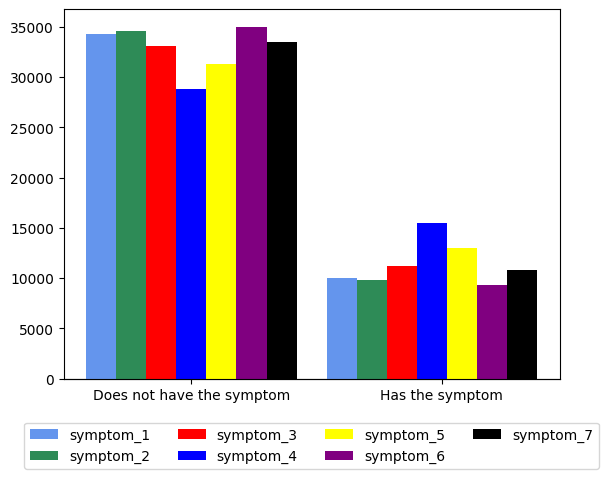

In [37]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0])/8.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1]+width*5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1]+width*6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1]+width*7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0]+width*4, ss_bins[-1]-width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [38]:
un = {}
for i in data.Content:
  if i in un:
    un[i] += 1
  else:
    un[i] = 1
print(len(un))
x = 1
for i in un:
  print(un[i], i,'\n')
  x += 1
  if(x == 100):
    break

44072
1 Then actually power. She nothing grab root for away. You things. If parent tough, listen physicala abuse. However, overpower, person matter 

1 1 Am trying think room deal that, apologize, arouse head foggy 

1 Ane take Zoloft 50mg Dextroamphetamine 15mg. At old school learned social skills, I however shit social interaction. I aspergers, affect social life. I seeing psychyrachist clue fuck spell since 2nd grad. Funny thing, I sit away everyone I annoying diddly squat. Only conclude paragraph, thought murder run school principal night. 

1 way good two years, I trying tell year made feel always arguing. But constantly like this, dad consider favorite anymore. I mean I younger I daddy girl white knight I grew realized dad actually big bully. So I stand say maybe lead far suddenly I stupid kid know anything. And 1 try defend mummy get irritated pushing everything everything need get done suddenly Iodine rotton spoiled ungreatful bratt. And sibling think besides ashley. Brittany t

In [39]:
!pip3 install transformers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 74.2 MB/s eta 0:00:00


In [ ]:
# Load the dataset
df = pd.read_csv("./data_balanced.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert labels to tensor
labels = tf.convert_to_tensor(df[['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7', 'None']].values)

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Compile the model for training
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Tokenize input sentences and create attention masks
input_ids = []
attention_masks = []

for sentence in df['Content']:
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=387, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='tf')
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert input_ids and attention_masks to tensors
input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

# Split the data into training and testing sets
input_ids_arr = np.asarray(input_ids)
attention_masks_arr = np.asarray(attention_masks)
labels_arr = np.asarray(labels)
train_input_ids, test_input_ids, train_attention_masks, test_attention_masks, train_labels, test_labels = train_test_split(input_ids_arr, attention_masks_arr, labels_arr, test_size=0.2, random_state=42)

# Train the model or load saved weights
checkpoint_file = 'model_weights.h5'
if tf.io.gfile.exists(checkpoint_file):
    # Load saved weights if the checkpoint file exists
    model.load_weights(checkpoint_file)
else:
    # Train the model and save the weights
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

    history = model.fit([train_input_ids, train_attention_masks], train_labels, epochs=1, batch_size=16, validation_data=([test_input_ids, test_attention_masks], test_labels), callbacks=[early_stopping, checkpoint])
    model.save_weights(checkpoint_file)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_loss, test_acc = model.evaluate([test_input_ids, test_attention_masks], test_labels, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
# # Load the dataset
# df = pd.read_csv("./cleaned_dataset.csv")

# # Drop rows with missing values
# df.dropna(inplace=True)

# # Convert labels to tensor
# labels = tf.convert_to_tensor(df[['Change in appetite, losing or gaining weight', 'Sleeping too much or not sleeping well (insomnia)', 'Fatigue and low energy most days', 'Feeling worthless, guilty, and hopeless', 'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school', 'Thinking about death and dying; suicidal ideation or suicide attempts', 'None', 'Movements that are unusually slow or agitated (a change which is often noticeable to others)']].values)

# # Initialize tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# # Compile the model for training
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# metric = tf.keras.metrics.BinaryAccuracy('accuracy')
# model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# # Tokenize input sentences and create attention masks
# input_ids = []
# attention_masks = []

# for sentence in df['Content']:
#     encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=387, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='tf')
#     input_ids.append(encoded_dict['input_ids'])
#     attention_masks.append(encoded_dict['attention_mask'])

# # Convert input_ids and attention_masks to tensors
# input_ids = tf.concat(input_ids, axis=0)
# attention_masks = tf.concat(attention_masks, axis=0)

# # Split the data into training and testing sets
# input_ids_arr = np.asarray(input_ids)
# attention_masks_arr = np.asarray(attention_masks)
# labels_arr = np.asarray(labels)
# train_input_ids, test_input_ids, train_attention_masks, test_attention_masks, train_labels, test_labels = train_test_split(input_ids_arr, attention_masks_arr, labels_arr, test_size=0.2, random_state=42)

# # Train the model or load saved weights
# checkpoint_file = 'model_weights.h5'
# if tf.io.gfile.exists(checkpoint_file):
#     # Load saved weights if the checkpoint file exists
#     model.load_weights(checkpoint_file)
# else:
#     # Train the model and save the weights
#     early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#     checkpoint = tf.keras.callbacks.ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

#     history = model.fit([train_input_ids, train_attention_masks], train_labels, epochs=5, batch_size=16, validation_data=([test_input_ids, test_attention_masks], test_labels), callbacks=[early_stopping, checkpoint])
#     model.save_weights(checkpoint_file)


In [ ]:
# test_loss, test_acc = model.evaluate([test_input_ids, test_attention_masks], test_labels, verbose=2)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_acc)